In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import warnings

warnings.filterwarnings('ignore')


In [2]:
# Load the dataset
df = pd.read_csv("Telecom_customer_churn.csv")


In [3]:
# Drop unnecessary columns
df.drop('customerID', axis='columns', inplace=True)


In [4]:
# Convert TotalCharges to numeric, forcing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [5]:
# Drop rows with missing TotalCharges values
df.dropna(inplace=True)


In [6]:
# Encode categorical features
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column}: {df[column].unique()}')

print_unique_col_values(df)


gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [7]:
# Replace 'No internet service' and 'No phone service' with 'No'
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)


In [9]:
# Convert binary categorical variables to numerical values
yes_no_columns = [
    'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn'
]

for col in yes_no_columns:
    df[col].replace({'Yes': 1, 'No': 0}, inplace=True)


In [10]:
# Convert 'gender' to numerical values
df['gender'].replace({'Female': 1, 'Male': 0}, inplace=True)


In [11]:
# One-hot encoding for categorical variables with multiple categories
df = pd.get_dummies(data=df, columns=['InternetService', 'Contract', 'PaymentMethod'])


In [12]:
# Feature scaling
scaler = MinMaxScaler()
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


In [13]:
# Split dataset into features and labels
X = df.drop('Churn', axis='columns')
y = df['Churn']


In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)


In [15]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier()
}


In [16]:
# Function to train and evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1, y_pred


In [17]:
# Train and evaluate each model
results = {}
for model_name, model in models.items():
    accuracy, precision, recall, f1, y_pred = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }
    print(f"Model: {model_name}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)


Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       999
           1       0.67      0.55      0.61       408

    accuracy                           0.79      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.79      0.79      1407

--------------------------------------------------
Model: SVM
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       999
           1       0.66      0.50      0.57       408

    accuracy                           0.78      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.77      0.78      0.77      1407

--------------------------------------------------
Model: Naive Bayes
              precision    recall  f1-score   support

           0       0.90      0.73      0.80       999
           1       0.55      0.80      0.65       408

    accuracy           

In [18]:
# Display the results
results_df = pd.DataFrame(results).T
print(results_df)


                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.793177   0.674627  0.553922  0.608345
SVM                  0.778962   0.657980  0.495098  0.565035
Naive Bayes          0.749112   0.546064  0.799020  0.648756
Random Forest        0.770434   0.641196  0.473039  0.544429


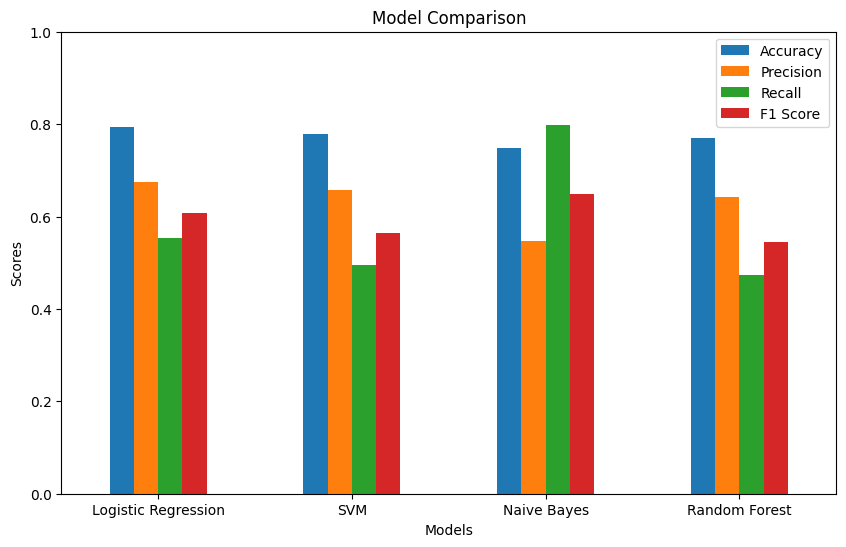

In [24]:
# Plot the results with rotated x-axis labels
results_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Comparison')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.ylim(0, 1)
plt.xticks(rotation=0)  # Rotate x-axis labels by 45 degrees
plt.savefig("model_comparison.png", bbox_inches='tight')  # Save the plot as a PNG file

plt.show()


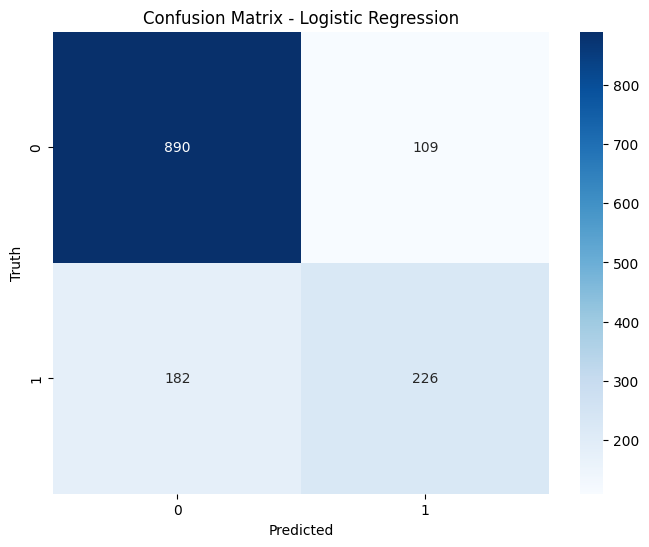

In [33]:
# Confusion Matrix for Logistic Regression
selected_model = models['Logistic Regression']
selected_model.fit(X_train, y_train)
y_pred = selected_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix - Logistic Regression')
plt.savefig("Churn Confusion Matrix.png",  bbox_inches='tight')
plt.show()


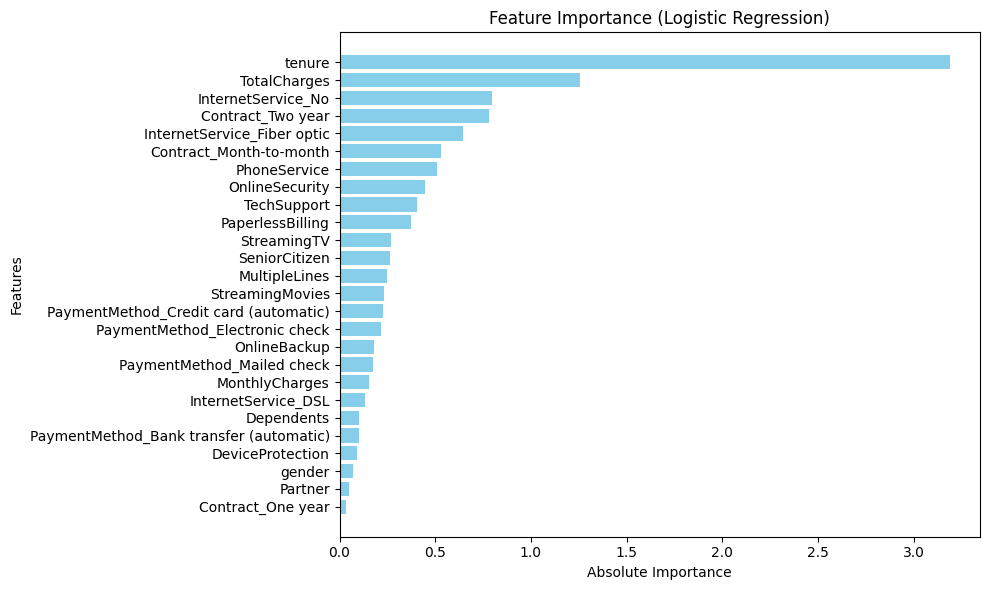

In [34]:
# Train the Logistic Regression model if not already trained
selected_model = LogisticRegression()
selected_model.fit(X_train, y_train)

# Get the feature names and their coefficients
features = X.columns
coefficients = selected_model.coef_[0]  # For binary classification, coef_ is a 2D array

# Create a DataFrame to hold feature names and their corresponding coefficients
feature_importance_df = pd.DataFrame({'Features': features, 'Importance': coefficients})
feature_importance_df['Absolute Importance'] = feature_importance_df['Importance'].abs()

# Sort features by absolute importance
feature_importance_df = feature_importance_df.sort_values(by='Absolute Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Features'], feature_importance_df['Absolute Importance'], color='skyblue')
plt.title('Feature Importance (Logistic Regression)')
plt.xlabel('Absolute Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.tight_layout()  # Adjust layout to prevent clipping of ylabel
plt.savefig("Featues Importance.png", bbox_inches="tight")
plt.show()
